In [3]:
import pandas as pd

df = pd.read_csv("kc_house_data.csv")  # Load dataset
df.dtypes  # Show data types


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [13]:

df.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
floor_counts = df['floors'].value_counts().to_frame()
floor_counts


,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


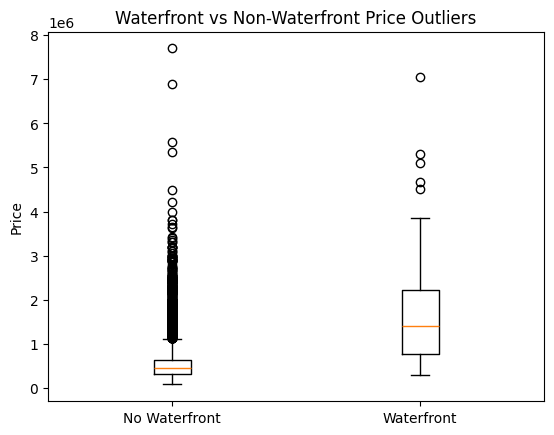

In [17]:
import matplotlib.pyplot as plt

# Group data by waterfront and plot boxplot using matplotlib
waterfront_0 = df[df['waterfront'] == 0]['price']
waterfront_1 = df[df['waterfront'] == 1]['price']

plt.boxplot([waterfront_0, waterfront_1], labels=['No Waterfront', 'Waterfront'])
plt.title("Waterfront vs Non-Waterfront Price Outliers")
plt.ylabel("Price")
plt.show()


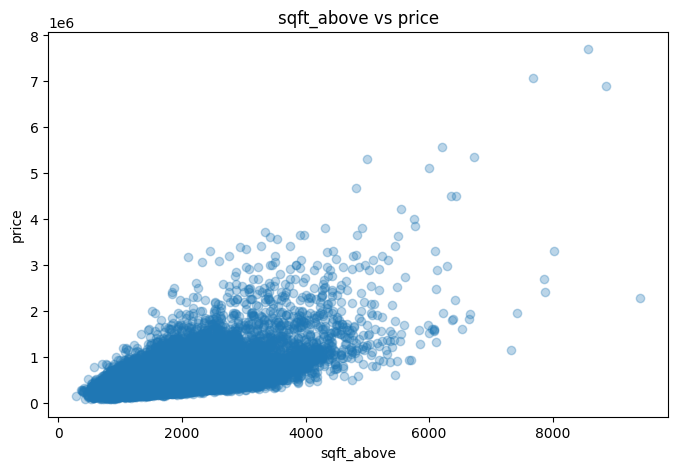

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df['sqft_above'], df['price'], alpha=0.3)
plt.title("sqft_above vs price")
plt.xlabel("sqft_above")
plt.ylabel("price")
plt.show()



In [7]:
from sklearn.linear_model import LinearRegression

X = df[['sqft_living']]
y = df['price']

lm = LinearRegression()
lm.fit(X, y)
print("R^2:", lm.score(X, y))


R^2: 0.4928532179037931


In [8]:
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view",
            "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

X = df[features]
y = df['price']

lm2 = LinearRegression()
lm2.fit(X, y)
print("R^2:", lm2.score(X, y))


R^2: 0.657715105827933


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])

pipe.fit(X, y)
print("R^2:", pipe.score(X, y))


R^2: 0.7513467656307783


In [10]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
print("R^2 on test data:", ridge.score(X_test, y_test))


R^2 on test data: 0.646019446860164


In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly2 = PolynomialFeatures(degree=2)
X_train_poly = poly2.fit_transform(X_train)
X_test_poly = poly2.transform(X_test)

ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(X_train_poly, y_train)
print("R^2 on test data (poly+ridge):", ridge_poly.score(X_test_poly, y_test))


R^2 on test data (poly+ridge): 0.7546208823569384
